In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import gc
%matplotlib inline
import os
print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'test_supplement.csv', 'sample_submission.csv', 'train_sample.csv']


# Lecture des fichiers Train et Test

In [3]:
dtypes = {
        'ip'            : 'uint32',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        }
path='../input/'
df_train = pd.read_csv('../input/train.csv', dtype=dtypes)
df_train = df_train.sample(n=10000000)
df_test=pd.read_csv('../input/test.csv')
df_train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
15770092,142860,64,1,31,459,2017-11-07 01:51:22,NaN,0
174168737,42748,15,1,6,120,2017-11-09 12:45:42,NaN,0
19894117,31415,11,1,6,319,2017-11-07 03:10:48,NaN,0
135601333,124973,2,1,18,122,2017-11-09 01:07:23,NaN,0
55909066,191817,18,3032,607,107,2017-11-07 14:41:27,NaN,0


In [4]:
#convert to category
Var = ['ip', 'app', 'device', 'os', 'channel']
for i in Var:
    df_train[i] = df_train[i].astype('category')
    
#convert to date/time
df_train['click_time'] = pd.to_datetime(df_train['click_time'])
df_train['attributed_time'] = pd.to_datetime(df_train['attributed_time'])

#extract hour as a feature
#df_train['click_week']=df_train['click_time'].dt.weekofyear
df_train['click_day']=df_train['click_time'].dt.dayofyear
df_train['click_hour']=df_train['click_time'].dt.hour

#  Distribution du Train et Test

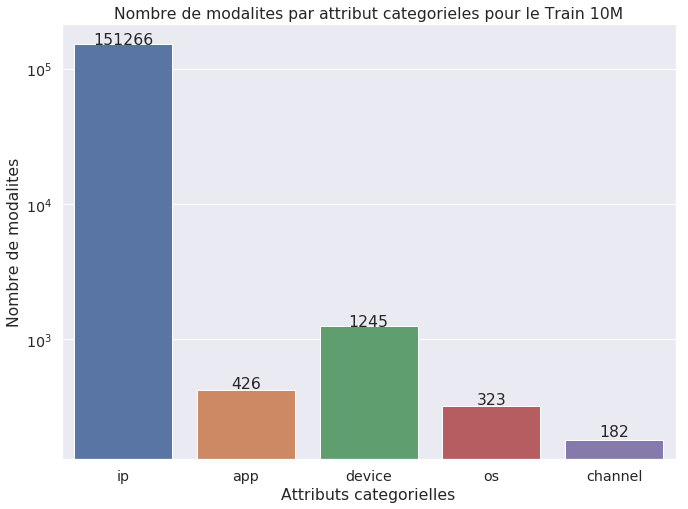

In [5]:
sns.set(rc={'figure.figsize':(11,8)})
modalites = [df_train[col].nunique() for col in Var]
sns.set(font_scale=1.3)
ax = sns.barplot(Var, modalites, log=True)
ax.set(xlabel='Attributs categorielles', ylabel='Nombre de modalites', title='Nombre de modalites par attribut categorieles pour le Train 10M')

for p, mod in zip(ax.patches, modalites):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            mod,
            ha="center") 

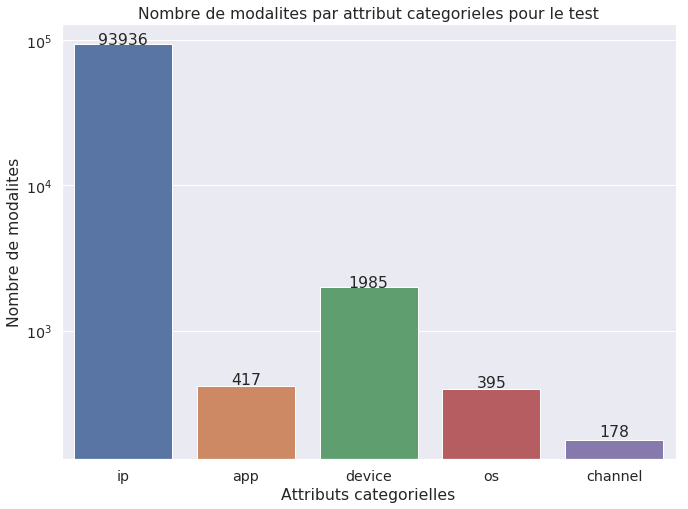

In [6]:
sns.set(rc={'figure.figsize':(11,8)})
modalites = [df_test[col].nunique() for col in Var]
sns.set(font_scale=1.3)
ax = sns.barplot(Var, modalites, log=True)
ax.set(xlabel='Attributs categorielles', ylabel='Nombre de modalites', title='Nombre de modalites par attribut categorieles pour le test')

for p, mod in zip(ax.patches, modalites):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            mod,
            ha="center") 

# Distribution de l'attribut Cible "is_attributed"

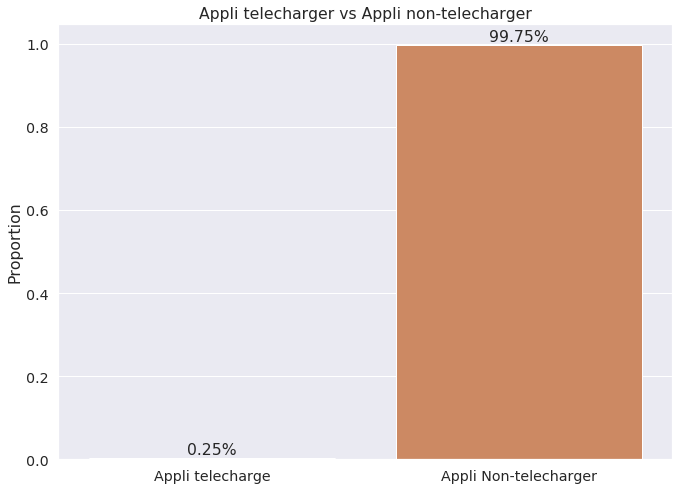

In [7]:
#sns.set(font_scale=1.2)
moy = (df_train.is_attributed.values == 1).mean()
ax = sns.barplot(['Appli telecharge', 'Appli Non-telecharger'], [moy, 1-moy])
ax.set(ylabel='Proportion', title='Appli telecharger vs Appli non-telecharger')
for p, nb in zip(ax.patches, [moy, 1-moy]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{}%'.format(round(nb * 100, 2)),
            ha="center")

# Distribution des attributs explicatives selon la Cible "is_attributed"

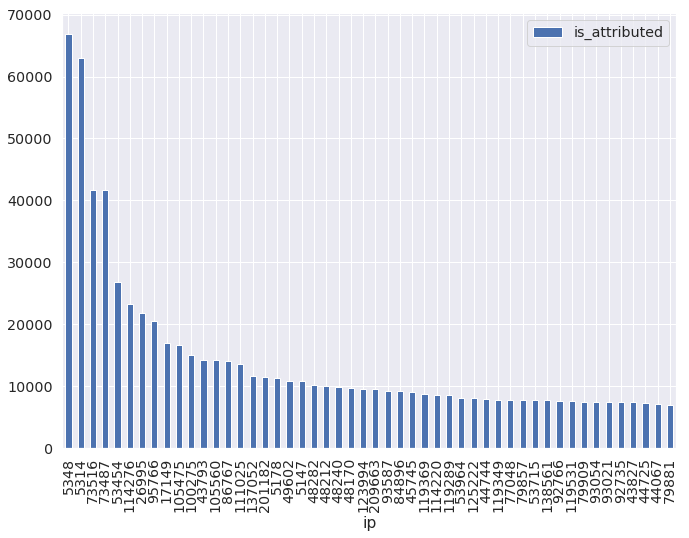

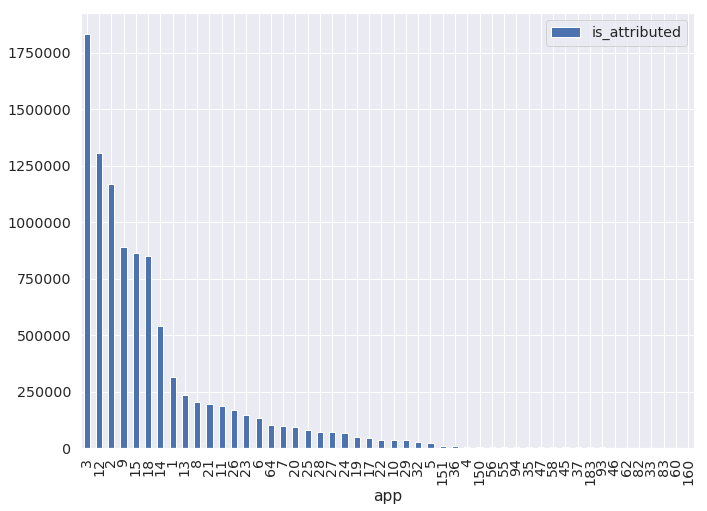

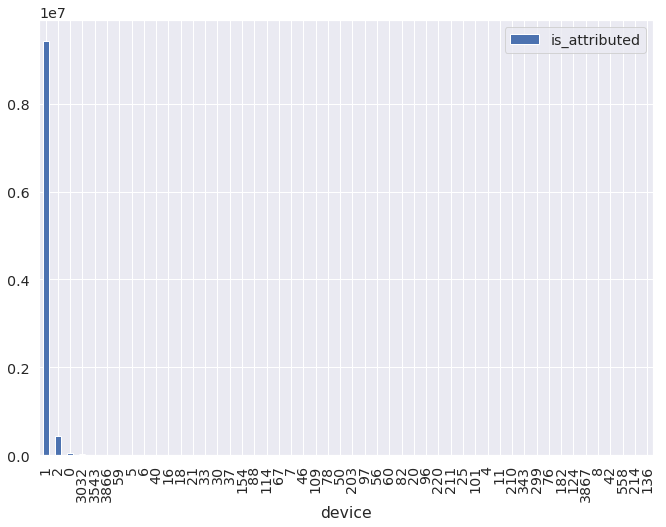

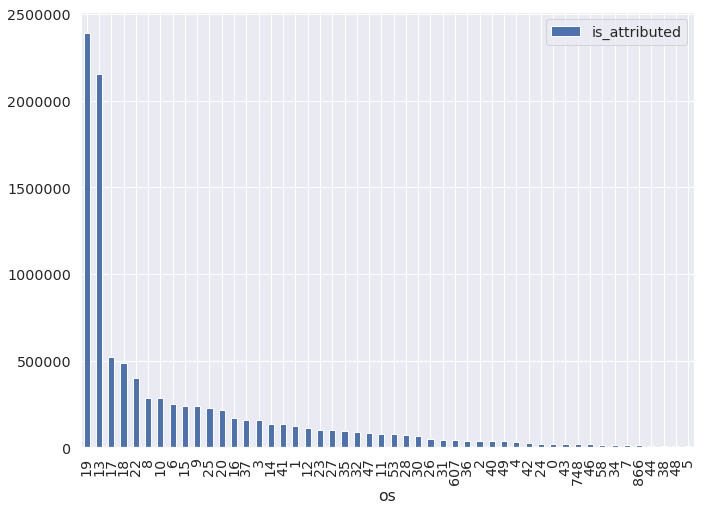

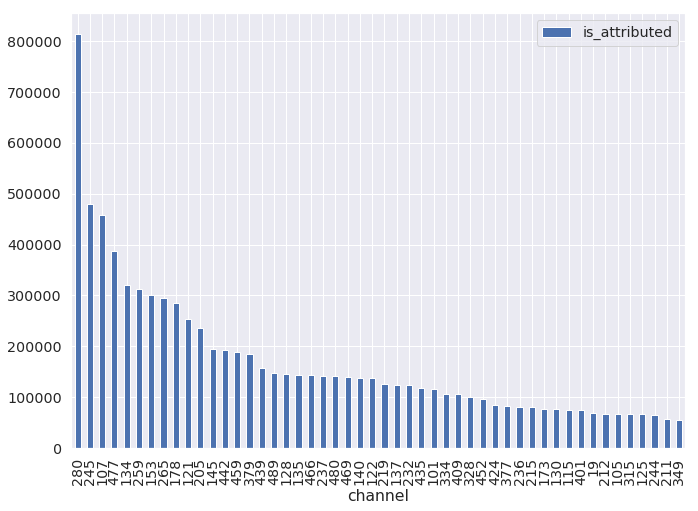

In [8]:
for v in Var:
    counts= df_train[[v,'is_attributed']].groupby([v], as_index=True).count().sort_values('is_attributed', ascending=False)
    #plt.ylabel('nombre');
    counts.head(50).plot(kind='bar')

# Distibution des Clics selon l'heure ou la Date 

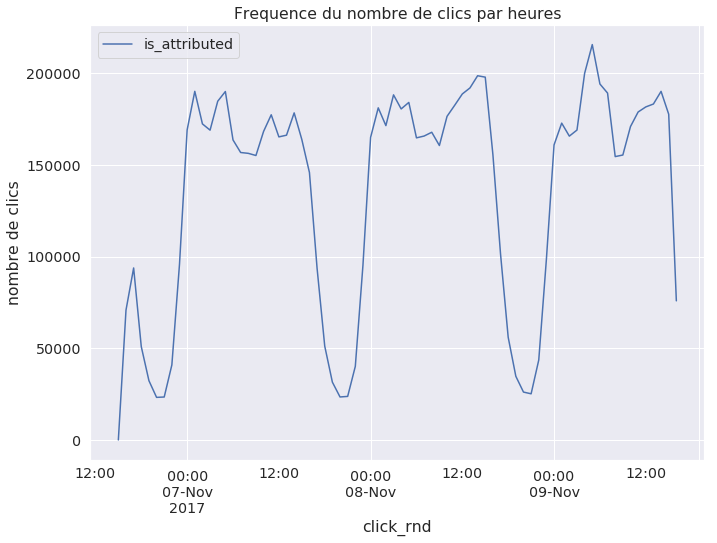

In [9]:
#round the time to nearest hour
df_train['click_rnd']=df_train['click_time'].dt.round('H')  

#check for hourly patterns
df_train[['click_rnd','is_attributed']].groupby(['click_rnd'], as_index=True).count().plot()
plt.title('Frequence du nombre de clics par heures');
plt.ylabel('nombre de clics');

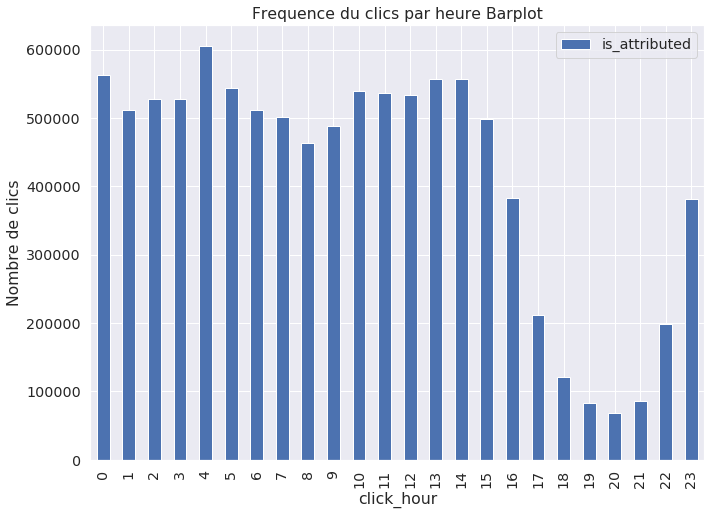

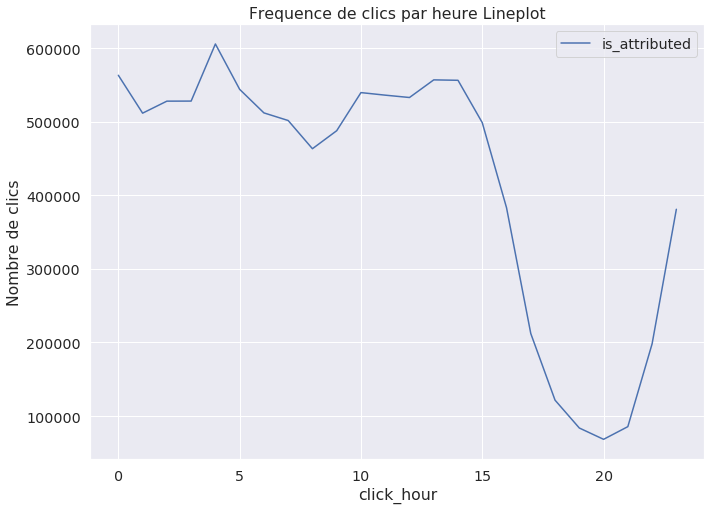

In [10]:
most_freq_hours_in_test_data = [4, 5, 9, 10, 13, 14]
least_freq_hours_in_test_data = [6, 11, 15]

df_train[['click_hour','is_attributed']].groupby(['click_hour'], as_index=True).count().plot(kind='bar')
plt.title('Frequence du clics par heure Barplot');
plt.ylabel('Nombre de clics');

df_train[['click_hour','is_attributed']].groupby(['click_hour'], as_index=True).count().plot()
plt.title('Frequence de clics par heure Lineplot');
plt.ylabel('Nombre de clics');

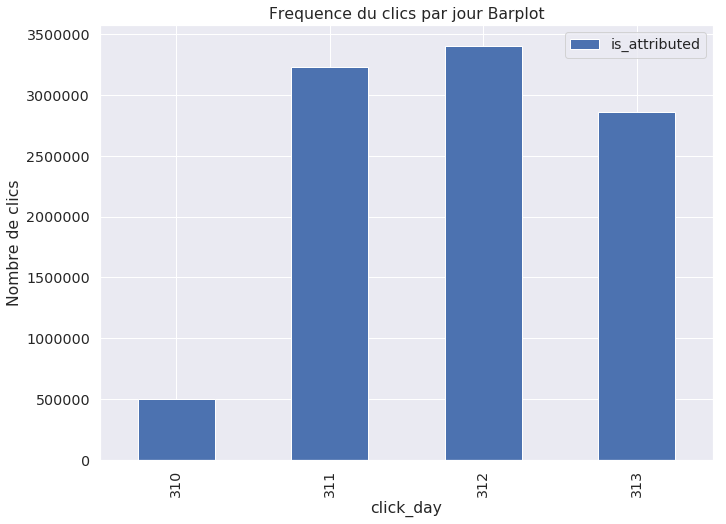

In [11]:
df_train[['click_day','is_attributed']].groupby(['click_day'], as_index=True).count().plot(kind='bar')
plt.title('Frequence du clics par jour Barplot');
plt.ylabel('Nombre de clics');